In [1]:
density = (mol_len / (rows * cols))
print(density)
def dens_check(density):
    if density >= 0.75 or density <= 0.01:
        print("Invalid packing density")

dens_check(density)


NameError: name 'mol_len' is not defined

Time: 0.04881095886230469 s for 2 molecules with 100 atoms


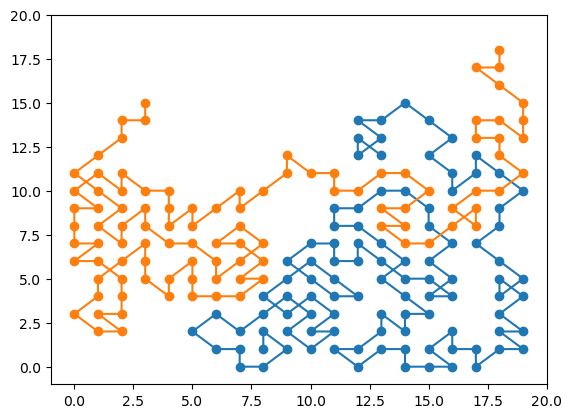

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

start_time = time.time() # Starting a timer

# Knobs to turn :)
mol_len = 100 # Length of the molecule chain
rows = 20 # Number of rows in array
cols = 20 # Number of columns in the array
moves = np.array([[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,1],[1,-1],[-1,-1]]) # Possible moves
num_mols = 2
all_paths = []
roll_back = int(np.ceil(mol_len / 1000))

# Creating array
array1 = np.zeros((rows,cols))

# Defining check to see if there is already a 'molecule' at that position
def check(array, move, position):
    global all_paths
    temp = position + move
    temp_tuple = tuple(temp) # Allowing comparison to array position
    if (temp[0] >= rows or temp[1] >= cols or temp[0] < 0 or temp[1] < 0 or 
    temp_tuple in {tuple(pos) for path in all_paths for pos in path}): # Check if move is occupied by previous molecule
        return False, array, position
    elif array[temp[0], temp[1]] == 0: # Check if move is occupied by this molecule
        position = temp
        array[position[0], position[1]] = 1
        return True, array, position
    else:
        return False, array, position

# Roll back function
def rollback(array, path, position):
    """Steps the molecule, path, and position back by a set amount of atoms.""" # Doesn't work at the moment
    global num_roll_back
    for x in range(roll_back):
        array[position[0], position[1]] = 0
        position = path[-(x + 1)]
    path = path[:-roll_back]
    num_roll_back += 1
    return path, position

# Plotting the path
def plot(paths):
    """Graphs the paths of the creation of the molecules."""
    for path in paths:
        path = np.array(path)
        plt.plot(path[:, 1], path[:, 0], marker='o')
    plt.xlim([-1, cols])
    plt.ylim([-1, rows])
    print("Time:", time.time() - start_time, "s for", len(paths), "molecules with", mol_len, "atoms")
    plt.show()

# Random walk function
def RandomWalk(array, length, num_mol):
    """Creates a path taken by a Monte-Carlo simulation to make a chain of atoms."""
    global all_paths
    for path in range(num_mol):
        path = []
        position = np.array([random.randint(0, rows - 1), random.randint(0, cols - 1)])
        array[position[0], position[1]] = 1
        path.append(position.tolist())
        i = 0 # Count of atoms placed
        j = 0 # Count of rejected moves
        while i < (length - 1): # Iterate through every atom in the molecule
            move = moves[random.randint(0, 7)]
            if j >= mol_len * 2: # Check if too many erroneous moves have been made
                # Resetting the array and position
                array.fill(0)
                position = np.array([random.randint(0, rows - 1), random.randint(0, cols - 1)])
                array[position[0], position[1]] = 1
                path = [position.tolist()]
                i = 0
                j = 0
                continue
            success, array, position = check(array, move, position)
            if not success:
                j += 1
                continue           
            path.append(position.tolist())
            i += 1
        all_paths.append(path)
    return all_paths

path = RandomWalk(array1, mol_len, num_mols)
plot(path)

Time: 0.010565757751464844 s for 2 molecules with 50 atoms


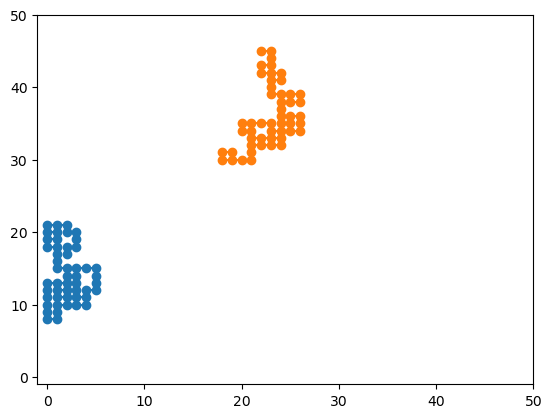

In [20]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

start_time = time.time() # Starting a timer

# Knobs to turn :)
mol_len = 50 # Length of the molecule chain
rows = 50 # Number of rows in array
cols = 50 # Number of columns in the array
moves = np.array([[1,0],[-1,0],[0,1],[0,-1]]) # Possible moves
num_mols = 2
all_paths = []
roll_back = int(np.ceil(mol_len / 1000))

# Creating array
array1 = np.zeros((rows,cols))

# Defining check to see if there is already a 'molecule' at that position
def check(array, move, position):
    global all_paths
    temp = position + move
    temp_tuple = tuple(temp)
    if temp[0] >= rows or temp[1] >= cols or temp[0] < 0 or temp[1] < 0 or temp_tuple in {tuple(pos) for path in all_paths for pos in path}:
        return False, array, position
    elif array[temp[0], temp[1]] == 0: # Checking to see if the move has already been made
        position = temp
        array[position[0], position[1]] = 1
        return True, array, position
    else:
        return False, array, position

# Roll back function (Doesn't work at the moment)
def rollback(array, path, position):
    """Steps the molecule, path, and position back by a set amount of atoms."""
    global num_roll_back
    for x in range(roll_back):
        array[position[0], position[1]] = 0
        position = path[-(x + 1)]
    path = path[:-roll_back]
    num_roll_back += 1
    return path, position

# Plotting the path
def plot(paths):
    """Graphs the paths of the creation of the molecules."""
    for path in paths:
        path = np.array(path)
        plt.plot(path[:, 1], path[:, 0], marker='o')
    plt.xlim([-1, cols])
    plt.ylim([-1, rows])
    print("Time:", time.time() - start_time, "s for", len(paths), "molecules with", mol_len, "atoms")
    plt.show()

# Random walk function
def RandomWalk(array, length, num_mol):
    """Creates a path taken by a Monte-Carlo simulation to make a chain of atoms."""
    global all_paths
    for path in range(num_mol):
        path = []
        position = np.array([random.randint(0, rows - 1), random.randint(0, cols - 1)])
        array[position[0], position[1]] = 1
        path.append(position.tolist())
        i = 0
        j = 0
        while i < (length - 1): # Iterate through every atom in the molecule
            move = moves[random.randint(0, 3)]
            if j >= mol_len * 2:
                # Resetting the array and position
                array.fill(0)
                position = np.array([random.randint(0, rows - 1), random.randint(0, cols - 1)])
                array[position[0], position[1]] = 1
                path = [position.tolist()]
                i = 0
                j = 0
                continue
            success, array, position = check(array, move, position)
            if not success:
                j += 1
                continue           
            path.append(position.tolist())
            i += 1
        all_paths.append(path)
    return all_paths

path = RandomWalk(array1, mol_len, num_mols)
plot(path)